In [19]:
#path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'
path = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/'

In [20]:
import glob

In [21]:
#files = glob.glob('%s/out_20171130_17*_node_*transformed_MVA/cat_opt.json' % path)
#files = glob.glob('%s/out_20180601_162230_node_*_transformed_MVA/cat_opt.json' % path)
#files = glob.glob('%s/out_20180601_164515_node_*_transformed_MVA/cat_opt.json' % path)
#date='20180628_143644'
date='20180712_150017'
files = glob.glob('%s/out_%s_node_*_transformed_MVA/cat_opt.json' % (path,date))
#files = glob.glob('%s/out_%s_node_*_transformed_MVA_step2/cat_opt.json' % (path,date))



In [22]:
files

[]

In [6]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom', 'nbins'] } #,'selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']} #,'selections']  }


for fil in files:
    dirnam = fil.split('/')[-2]
    name = dirnam.split('node_')[-1]
    dirSuf = name.replace(name.split('_')[0]+'_','')
#    nbins = int(dirnam.split('_')[-3].split('x')[0])
    if name == str('SM_'+dirSuf): name = '0'
    node = int(name.replace('_'+dirSuf,''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
#        val['nbins'] = nbins
        val['boundaries'] = np.array(val['boundaries'])
        #val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

#print(summary)
    

In [7]:
import pandas as pd
df = pd.DataFrame(summary)

In [8]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [9]:
df.sort_index(inplace=True)
df

boundaries     fom  ncat  node
ncat node                                                 
3    0     [1.01, 0.749, 0.507, 0.261]  -2.379     3     0
     2     [1.01, 0.743, 0.522, 0.322]  -3.909     3     2
     3     [1.01, 0.781, 0.417, 0.015]  35.166     3     3
     4     [1.01, 0.704, 0.358, 0.257]  -3.745     3     4
     5      [1.01, 0.744, 0.48, 0.268]  -2.776     3     5
     6     [1.01, 0.747, 0.435, 0.016]  -4.141     3     6
     7      [1.01, 0.73, 0.508, 0.292]  -4.274     3     7
     8     [1.01, 0.541, 0.354, 0.175]  -2.167     3     8
     9     [1.01, 0.748, 0.517, 0.308]  -2.902     3     9
     10     [1.01, 0.685, 0.508, 0.29]  -3.259     3    10
     11    [1.01, 0.757, 0.368, 0.015]   1.525     3    11
     12     [1.01, 0.749, 0.591, 0.39]  -5.270     3    12
     13      [1.01, 0.73, 0.52, 0.371]  -5.526     3    13
     14    [1.01, 0.742, 0.519, 0.295]  -3.530     3    14

In [10]:
df = df.query('fom<0')

In [11]:
df

boundaries    fom  ncat  node
ncat node                                                
3    0     [1.01, 0.749, 0.507, 0.261] -2.379     3     0
     2     [1.01, 0.743, 0.522, 0.322] -3.909     3     2
     4     [1.01, 0.704, 0.358, 0.257] -3.745     3     4
     5      [1.01, 0.744, 0.48, 0.268] -2.776     3     5
     6     [1.01, 0.747, 0.435, 0.016] -4.141     3     6
     7      [1.01, 0.73, 0.508, 0.292] -4.274     3     7
     8     [1.01, 0.541, 0.354, 0.175] -2.167     3     8
     9     [1.01, 0.748, 0.517, 0.308] -2.902     3     9
     10     [1.01, 0.685, 0.508, 0.29] -3.259     3    10
     12     [1.01, 0.749, 0.591, 0.39] -5.270     3    12
     13      [1.01, 0.73, 0.52, 0.371] -5.526     3    13
     14    [1.01, 0.742, 0.519, 0.295] -3.530     3    14

In [12]:
boundaries = np.vstack(df.loc[[3,3]]['boundaries']) 
print boundaries
boundaries[:,0] = 1.001
boundaries_shape = boundaries.shape
print boundaries_shape
boundaries=np.array(boundaries[boundaries[:,3] > 0.11]).reshape(-1,4)
print boundaries

[[ 1.01   0.749  0.507  0.261]
 [ 1.01   0.743  0.522  0.322]
 [ 1.01   0.704  0.358  0.257]
 [ 1.01   0.744  0.48   0.268]
 [ 1.01   0.747  0.435  0.016]
 [ 1.01   0.73   0.508  0.292]
 [ 1.01   0.541  0.354  0.175]
 [ 1.01   0.748  0.517  0.308]
 [ 1.01   0.685  0.508  0.29 ]
 [ 1.01   0.749  0.591  0.39 ]
 [ 1.01   0.73   0.52   0.371]
 [ 1.01   0.742  0.519  0.295]]
(12, 4)
[[ 1.001  0.749  0.507  0.261]
 [ 1.001  0.743  0.522  0.322]
 [ 1.001  0.704  0.358  0.257]
 [ 1.001  0.744  0.48   0.268]
 [ 1.001  0.73   0.508  0.292]
 [ 1.001  0.541  0.354  0.175]
 [ 1.001  0.748  0.517  0.308]
 [ 1.001  0.685  0.508  0.29 ]
 [ 1.001  0.749  0.591  0.39 ]
 [ 1.001  0.73   0.52   0.371]
 [ 1.001  0.742  0.519  0.295]]


In [13]:
boundaries_sort=[]
for i in range(boundaries.shape[0]):
    if (sorted(boundaries[i],reverse=True)==boundaries[i]).all():
        boundaries_sort.append(boundaries[i])

In [14]:
boundaries = np.array(boundaries_sort)
means = boundaries.mean(axis=0)
means

array([ 1.001     ,  0.715     ,  0.48945455,  0.29354545])

In [49]:
#boundaries.std(axis=0)

In [16]:
import os
tag='newcodev2_optv2all'
pathsave = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/plots/%s_%s/'%(date,tag)
if not os.path.exists(pathsave):
    print pathsave, "doesn't exist, creating it..."
    os.makedirs(pathsave)

/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/plots/20180712_140549_newcodev2_optv2all/ doesn't exist, creating it...


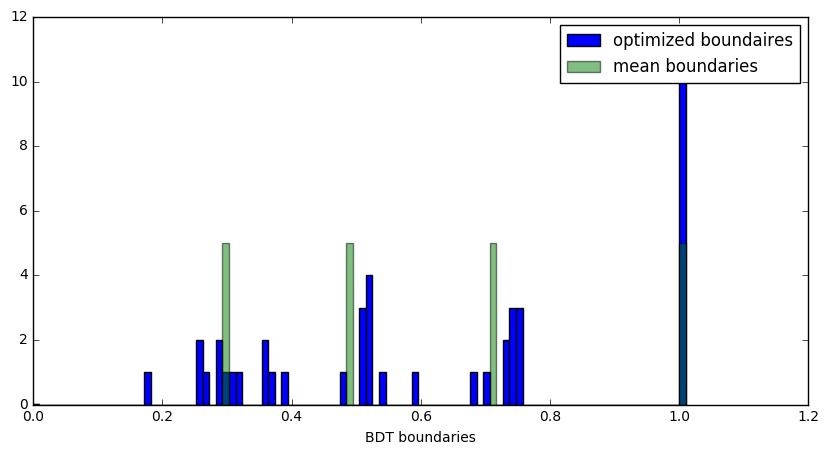

In [17]:
import matplotlib.pyplot as plt

plt.clf()
# means[0] = 1.001
plt.figure(figsize=(10,5))
plt.hist(boundaries.ravel(),bins=100,range=[0.,1.01],label="optimized boundaires");
plt.hist(means,bins=100,range=[0.,1.01],weights=5.*np.ones_like(means),alpha=0.5,label="mean boundaries");
plt.xlabel("BDT boundaries")
plt.legend()
plt.savefig(pathsave+"clusteringMVA_%s_%s"%(tag,date)+".pdf")
plt.show()

In [18]:
print means
info_file = open(pathsave+"info_clusteringMVA_%s_%s.txt"%(tag,date),"w") 
info_file.write(",\n".join([str(i) for i in means]))
info_file.close()

[ 1.001       0.715       0.48945455  0.29354545]
